# 算法分析
1. 对k个初始中心的选择比较敏感，容易陷入局部最小值。
2. k值的选择由用户指定，不同的k得到的结果会有较大不同
3. 存在局限性，非球型数据分布不能得到很好的聚类结果
4. 数据量大的时候，收敛会比较慢（可以使用Mini Batch K-Means解决）



cluster down


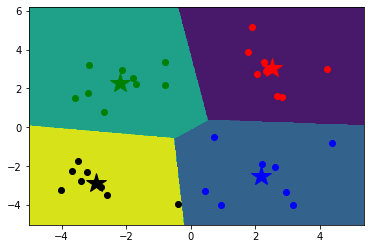

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#加载数据
data = np.genfromtxt("kmeans.csv",delimiter=',')
# print(data.shape)

# plt.scatter(data[:,0],data[:,1])
# plt.show()

###训练模型
def Distance(vector1,vector2):
    return np.sqrt(sum((vector2-vector1)**2))

#初始化中心
def InitCentroids(data,k):
    numSamples,dim = data.shape
    #k个中心 列数和样本列数相同
    centroids = np.zeros((k,dim))
    #随机选出k个中心
    for i in range(k):
        #随机选取一个样本的索引
        index = int(np.random.uniform(0,numSamples))
        #作为初始化的中心
        centroids[i,:] = data[index,:]
    return centroids

#传入数据集和k的值
def Kmeans(data,k):
    #计算样本个数
    numSamples = data.shape[0]
    #样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本和它所属簇的误差
    clusterData = np.array(np.zeros((numSamples,2)))
    #决定中心是否改变
    clusterChanged = True
    #初始化中心
    centroids = InitCentroids(data,k)
    
    while clusterChanged:
        clusterChanged=False
        #循环每一个样本
        for i in range(numSamples):
            #最小距离
            minDist = 100000.0
            #定义样本所属的簇
            minIndex = 0
            #循环计算每个中心和该样本的距离
            for j in range(k):
                #循环每一个中心和样本，计算距离
                distance = Distance(centroids[j,:],data[i,:])
                #如果计算的距离小于最小距离，则更新最小距离
                if distance < minDist :
                    minDist = distance
                    clusterData[i,1] = minDist
                    #更新样本所属的簇
                    minIndex = j
            #如果样本所属的簇发生变化
            if clusterData[i,0] != minIndex:
                #重新计算中心
                clusterChanged = True
                #更新样本的簇
                clusterData[i,0] = minIndex
        #更新中心
        for j in range(k):
            #获取第j个簇所有的样本所在的索引
            cluster_index = np.nonzero(clusterData[:,0]==j)
            #第j个簇所有的样本点
            pointsInCluster = data[cluster_index]
            #计算中心
            centroids[j,:] = np.mean(pointsInCluster,axis=0)
            
    return centroids,clusterData #中心，所属的簇

#显示结果
def showCluster(data,k,centroids,clusterData):
    numSamples,dim = data.shape
    if dim != 2:
        print("dimension of your data is not 2!")
        reture -1
    #用不同颜色形状来表示各个样本点类别
    mark = ['or','ob','og','ok','^r','+r','sr','dr','<r','pr']
    if k > len(mark):
        print('your k is too large!')
        return -1
    #画样本点
    for i in range(numSamples):
        markIndex = int(clusterData[i,0])
        plt.plot(data[i,0],data[i,1],mark[markIndex])
    
    #用不同颜色形状表示各个中心类别
    mark = ['*r','*b','*g','*k','^b','+b','sb','db','<b','pb']
    #画中心点
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],mark[i],markersize=20)
    plt.show()
    
#设置k值
k = 4
centroids,clusterData = Kmeans(data,k)
if np.isnan(centroids).any():
    print('Error')
else:
    print("cluster down")

#显示结果
# showCluster(data,k,centroids,clusterData)

####做预测
x_test = [0,1]
np.tile(x_test,(k,1))

'''
#误差
np.tile(x_test,(k,1))-centroids

#误差的平方
(np.tile(x_test,(k,1))-centroids)**2

#误差平方和
((np.tile(x_test,(k,1))-centroids)**2).sum(axis=1)

#误差最小值所在的索引号
np.argmin(((np.tile(x_test,(k,1))-centroids)**2).sum(axis=1))
'''
def predict(date):
    return np.array([np.argmin(((np.tile(x_test,(k,1))-centroids)**2).sum(axis=1)) for x_test in date])

#获得簇的作用域
x_min,x_max = data[:,0].min()-1,data[:,0].max()+1
y_min,y_max = data[:,1].min()-1,data[:,1].max()+1

#生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))

z = predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
#等高线图
cs = plt.contourf(xx,yy,z)

#显示结果
showCluster(data,k,centroids,clusterData)




# sklearn封装好的K-Means算法

[[ 1.88518667 -2.65650178]
 [-2.197757    2.28274678]
 [-3.30488414 -2.69310371]
 [ 2.50202613  3.027871  ]]
[1 0 2 3 1 0 2 3 1 0 0 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1]


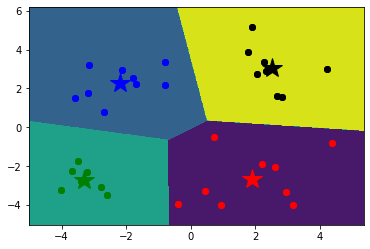

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

#加载数据
data = np.genfromtxt("kmeans.csv",delimiter=',')

#设置 k 值
k = 4

#创建模型，并训练
model = KMeans(n_clusters=k)
model.fit(data)

#分类中心点坐标
centers = model.cluster_centers_
print(centers)

#预测
result = model.predict(data)
print(result)
# print(model.labels_)#同样输出预测结果

#获得簇的作用域
x_min,x_max = data[:,0].min()-1,data[:,0].max()+1
y_min,y_max = data[:,1].min()-1,data[:,1].max()+1

#生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

#等高线图
cs = plt.contourf(xx,yy,z)

#画出各个数据点，用不同颜色表示分类
mark = ['or','ob','og','ok']
for i,d in enumerate(data):
    plt.plot(d[0],d[1],mark[result[i]])

for i,d in enumerate(data):
    plt.plot(d[0],d[1],mark[result[i]])

#画出各个分类的中心点
mark = ['*r','*b','*g','*k']

for i,center in enumerate(centers):
    plt.plot(center[0],center[1],mark[i],markersize=20)

    
plt.show()





C:\Users\HL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\HL\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


cluster complete


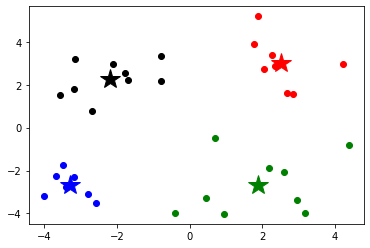

In [1]:
"""
k-Means 算法优化1
使用多次的随机初始化，计算每一次建模得到的代价函数的值，
选取代价函数最小结果作为聚类结果。


"""
import numpy as np
import matplotlib.pyplot as plt
import warnings



#加载数据
data = np.genfromtxt("kmeans.csv",delimiter=',')
# print(data.shape)

# plt.scatter(data[:,0],data[:,1])
# plt.show()

###训练模型
def Distance(vector1,vector2):
    return np.sqrt(sum((vector2-vector1)**2))

#初始化中心
def InitCentroids(data,k):
    numSamples,dim = data.shape
    #k个中心 列数和样本列数相同
    centroids = np.zeros((k,dim))
    #随机选出k个中心
    for i in range(k):
        #随机选取一个样本的索引
        index = int(np.random.uniform(0,numSamples))
        #作为初始化的中心
        centroids[i,:] = data[index,:]
    return centroids

#传入数据集和k的值
def Kmeans(data,k):
    #计算样本个数
    numSamples = data.shape[0]
    #样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本和它所属簇的误差
    clusterData = np.array(np.zeros((numSamples,2)))
    #决定中心是否改变
    clusterChanged = True
    #初始化中心
    centroids = InitCentroids(data,k)
    
    while clusterChanged:
        clusterChanged=False
        #循环每一个样本
        for i in range(numSamples):
            #最小距离
            minDist = 100000.0
            #定义样本所属的簇
            minIndex = 0
            #循环计算每个中心和该样本的距离
            for j in range(k):
                #循环每一个中心和样本，计算距离
                distance = Distance(centroids[j,:],data[i,:])
                #如果计算的距离小于最小距离，则更新最小距离
                if distance < minDist :
                    minDist = distance
                    clusterData[i,1] = minDist
                    #更新样本所属的簇
                    minIndex = j
            #如果样本所属的簇发生变化
            if clusterData[i,0] != minIndex:
                #重新计算中心
                clusterChanged = True
                #更新样本的簇
                clusterData[i,0] = minIndex
        #更新中心
        for j in range(k):
            #获取第j个簇所有的样本所在的索引
            cluster_index = np.nonzero(clusterData[:,0]==j)
            #第j个簇所有的样本点
            pointsInCluster = data[cluster_index]
            #计算中心
            centroids[j,:] = np.mean(pointsInCluster,axis=0)
            
    return centroids,clusterData #中心，所属的簇

#显示结果
def showCluster(data,k,centroids,clusterData):
    numSamples,dim = data.shape
    if dim != 2:
        print("dimension of your data is not 2!")
        reture -1
    #用不同颜色形状来表示各个样本点类别
    mark = ['or','ob','og','ok','^r','+r','sr','dr','<r','pr']
    if k > len(mark):
        print('your k is too large!')
        return -1
    #画样本点
    for i in range(numSamples):
        markIndex = int(clusterData[i,0])
        plt.plot(data[i,0],data[i,1],mark[markIndex])
    
    #用不同颜色形状表示各个中心类别
    mark = ['*r','*b','*g','*k','^b','+b','sb','db','<b','pb']
    #画中心点
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],mark[i],markersize=20)
    plt.show()
    
#设置k值
k = 4

min_loss = 10000
min_loss_centroids = np.array([])
min_loss_clusterData = np.array([])

for i in range(50):
    centroids,clusterData = Kmeans(data,k)
    loss = sum(clusterData[:,1])/data.shape[0]
    if loss < min_loss:
        min_loss = loss
        min_loss_centroids = centroids
        min_loss_clusterData = clusterData
print("cluster complete")
centroids = min_loss_centroids
clusterData = min_loss_clusterData

#显示结果
showCluster(data,k,centroids,clusterData)



C:\Users\HL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\HL\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


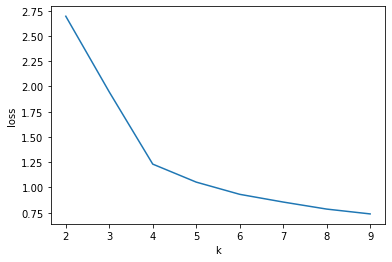

In [1]:
"""
优化2：
 
 使用肘部法则来选取k的值
 
"""

import numpy as np
import matplotlib.pyplot as plt
import warnings



#加载数据
data = np.genfromtxt("kmeans.csv",delimiter=',')
# print(data.shape)

# plt.scatter(data[:,0],data[:,1])
# plt.show()

###训练模型
def Distance(vector1,vector2):
    return np.sqrt(sum((vector2-vector1)**2))

#初始化中心
def InitCentroids(data,k):
    numSamples,dim = data.shape
    #k个中心 列数和样本列数相同
    centroids = np.zeros((k,dim))
    #随机选出k个中心
    for i in range(k):
        #随机选取一个样本的索引
        index = int(np.random.uniform(0,numSamples))
        #作为初始化的中心
        centroids[i,:] = data[index,:]
    return centroids

#传入数据集和k的值
def Kmeans(data,k):
    #计算样本个数
    numSamples = data.shape[0]
    #样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本和它所属簇的误差
    clusterData = np.array(np.zeros((numSamples,2)))
    #决定中心是否改变
    clusterChanged = True
    #初始化中心
    centroids = InitCentroids(data,k)
    
    while clusterChanged:
        clusterChanged=False
        #循环每一个样本
        for i in range(numSamples):
            #最小距离
            minDist = 100000.0
            #定义样本所属的簇
            minIndex = 0
            #循环计算每个中心和该样本的距离
            for j in range(k):
                #循环每一个中心和样本，计算距离
                distance = Distance(centroids[j,:],data[i,:])
                #如果计算的距离小于最小距离，则更新最小距离
                if distance < minDist :
                    minDist = distance
                    clusterData[i,1] = minDist
                    #更新样本所属的簇
                    minIndex = j
            #如果样本所属的簇发生变化
            if clusterData[i,0] != minIndex:
                #重新计算中心
                clusterChanged = True
                #更新样本的簇
                clusterData[i,0] = minIndex
        #更新中心
        for j in range(k):
            #获取第j个簇所有的样本所在的索引
            cluster_index = np.nonzero(clusterData[:,0]==j)
            #第j个簇所有的样本点
            pointsInCluster = data[cluster_index]
            #计算中心
            centroids[j,:] = np.mean(pointsInCluster,axis=0)
            
    return centroids,clusterData #中心，所属的簇

#显示结果
def showCluster(data,k,centroids,clusterData):
    numSamples,dim = data.shape
    if dim != 2:
        print("dimension of your data is not 2!")
        reture -1
    #用不同颜色形状来表示各个样本点类别
    mark = ['or','ob','og','ok','^r','+r','sr','dr','<r','pr']
    if k > len(mark):
        print('your k is too large!')
        return -1
    #画样本点
    for i in range(numSamples):
        markIndex = int(clusterData[i,0])
        plt.plot(data[i,0],data[i,1],mark[markIndex])
    
    #用不同颜色形状表示各个中心类别
    mark = ['*r','*b','*g','*k','^b','+b','sb','db','<b','pb']
    #画中心点
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],mark[i],markersize=20)
    plt.show()
       
#试一试k值选取
list_lost=[]
for k in range(2,10):

    min_loss = 10000
    min_loss_centroids = np.array([])
    min_loss_clusterData = np.array([])

    for i in range(50):
        centroids,clusterData = Kmeans(data,k)
        loss = sum(clusterData[:,1])/data.shape[0]
        if loss < min_loss:
            min_loss = loss
            min_loss_centroids = centroids
            min_loss_clusterData = clusterData
    list_lost.append(min_loss)
    
# print("cluster complete")
# centroids = min_loss_centroids
# clusterData = min_loss_clusterData

# #显示结果
# showCluster(data,k,centroids,clusterData)

plt.plot(range(2,10),list_lost)
plt.xlabel("k")
plt.ylabel("loss")
plt.show()